<h1> New York Taxi Fare Price Prediction </h1>

In this project using <b>New York</b> dataset we will predict the fare price of next trip.

The dataset can be downloaded from https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips

The dataset contains 8 features like pickup lat-lang and drop lat-lang

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Dataset/train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
df_test=pd.read_csv('./Dataset/test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.089104e+07,2.089104e+07,2.089104e+07,2.089090e+07,2.089090e+07,2.089104e+07
mean,1.134294e+01,-7.251111e+01,3.992057e+01,-7.251025e+01,3.991853e+01,1.685295e+00
std,1.665903e+01,1.304707e+01,9.525859e+00,1.292337e+01,9.660777e+00,1.322193e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


In [233]:
df.shape

(20891046, 8)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20891046 entries, 0 to 20891045
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtypes: float64(6), object(2)
memory usage: 1.2+ GB


In [235]:
df.isnull().sum()

key                    0
fare_amount            1
pickup_datetime        1
pickup_longitude       1
pickup_latitude        1
dropoff_longitude    147
dropoff_latitude     147
passenger_count        1
dtype: int64

<h1> Data Preprocessing </h1>

<h3> Missing Values </h3>

Above we can see our dataset have minor missing values 147 records maximum.<br>So we can easily drop that data because our dataset is much  larger

Drop column <b> Key </b>also

In [5]:
df=df.dropna()
df=df.drop('key',axis=1)
df.shape

(20890899, 7)

<h3> Let's Check the coordinates data </h3>

First find pickup lat lang min max coordinates

In [6]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())

min_max()

3457.6256829999998 -3439.2450619999995
3406.0083950000003 -3492.263768
3457.62235 -3442.0245649999997
3400.391603 -3547.886698


Latitude is always range between -90 to 90

Longitude is always range between -180 to 180

And whatever above this range is wrong data

First check any data above this range

In [7]:
def coordinate_data():
    print(df[(df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0) ]['pickup_longitude'].count())
    print(df[(df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0) ]['pickup_latitude'].count())
    print(df[(df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0)]['dropoff_longitude'].count())
    print(df[(df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0) ]['dropoff_latitude'].count())

coordinate_data()

398452
397054
397509
396286


We can see so many records are out of range so its not possible to have 
Let's remove it...

We will use <b> ~ </b> sign to remove all data which match condition

In [8]:
df=df[~((df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0))]
df=df[~((df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0))]
df=df[~((df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0))]
df=df[~((df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0))]

# call function to check
coordinate_data()
min_max()

0
0
0
0
154.10075600000002 -168.603534
89.533332 -77.833874
154.10075600000002 -173.95763
88.75 -74.1932


In [9]:
# remove where pickup and drop location are same
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(217707, 7)


In [10]:
print(df_test.pickup_latitude.min(), df_test.pickup_latitude.max())
print(df_test.pickup_longitude.min(), df_test.pickup_longitude.max())

40.573143 41.709555
-74.252193 -72.986532


In [97]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [98]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

1771
1768
1947
1782


In [99]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(2022562, 27)

Our system is not capable of proessing <b>20 Millions</b> records.

Processing <b>20 Millions</b> will take lot's of time

I'll select randomly <b>10% </b>dataset and make model

In [105]:
#Randomly select 10% data 

df = df.sample(frac=0.1)
df.shape

(2025578, 10)

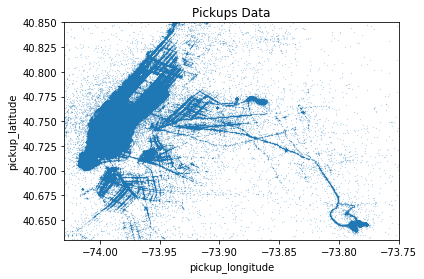

In [106]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

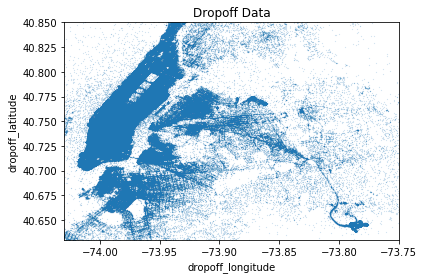

In [107]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [7]:
#JFK Airport 

JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 

Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Staten Island
Island={
    "min_long":-74.35,
    "min_lat":40.52,
    "max_long":-73.97,
    "max_lat":40.65 }

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LibertyAirport

LibertyAirport={
    "min_long":-74.20,
    "min_lat":40.67,
    "max_long":-74.15,
    "max_lat":40.70}

#LaGuardia

LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx

Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

In [32]:
def pickup_place(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (30878, 27)
Manhattan Pickup Total  (1900791, 27)
Brroklyn Pickup Total  (22765, 27)
Bronx Pickup Total  (2510, 27)
LaGuardia Pickup Total  (41430, 27)


In [33]:
def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , drop_place(JFK,df).shape)
print("Manhattan Pickup Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , drop_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , drop_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , drop_place(LaGuardia,df).shape)

JFK Pickup Total  (15415, 27)
Manhattan Pickup Total  (1843527, 27)
Brroklyn Pickup Total  (44916, 27)
Bronx Pickup Total  (12764, 27)
LaGuardia Pickup Total  (26394, 27)


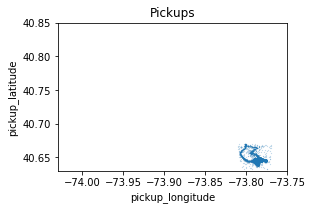

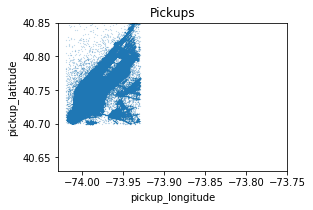

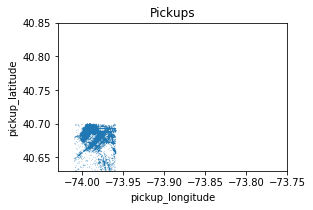

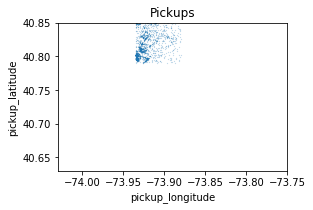

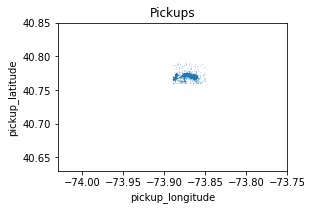

In [127]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup(Area,data)
    d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()


ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

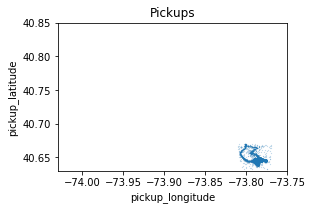

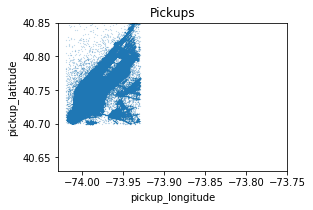

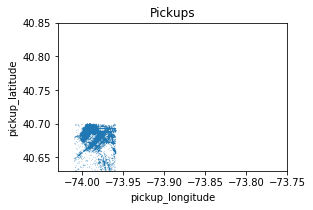

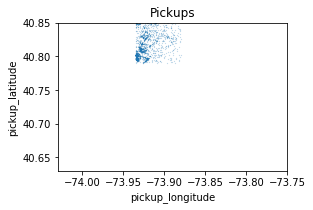

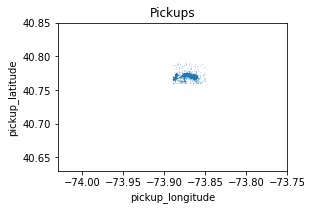

In [128]:

def plotDropAreaEachPlace(Area,data,ax):
    d=pickup(Area,data)
    d.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

Passenger Count Data

In [135]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

9
0


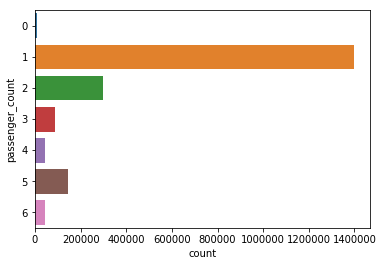

In [233]:
sns.countplot(y='passenger_count',data=df)

In [137]:
df=df[~((df['passenger_count']>6))]
df.shape

(2025573, 10)

In [138]:
df[df['fare_amount']<=0]['fare_amount'].count()

120

In [139]:
df=df[~(df['fare_amount']<=0)]

<h1>Feature Engineering </h1>

In [140]:
df['pickup_day']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df['pickup_month']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011


In [141]:
df['pickup_weekday'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3


In [142]:
df['pickup_hour']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,15
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,17
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,19
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,9
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,9


In [143]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,15,0
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,17,0
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,19,0
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,9,0
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,9,0


In [144]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,15,0,0
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,17,0,1
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,19,0,1
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,9,0,0
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,9,0,0


In [145]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,15,0,0,0
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,17,0,1,1
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,19,0,1,0
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,9,0,0,0
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,9,0,0,0


In [146]:
#Distance calculator between two pickup and drop coordinates

from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

In [147]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
1993715,6.0,2013-05-15 15:15:41 UTC,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,15,0,0,0,1.118396
11256708,15.3,2010-02-15 17:04:00 UTC,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,17,0,1,1,3.865836
7210005,13.3,2012-08-21 19:51:27 UTC,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,19,0,1,0,5.264008
19045568,8.5,2009-04-08 09:37:00 UTC,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,9,0,0,0,2.505540
3928049,16.9,2011-06-02 09:24:36 UTC,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,9,0,0,0,1.716791


In [6]:
def place_mapping(lat,lang,place_area,place_name):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [34]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan,"Manhattan"),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK,"JFK Airport"),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn,"Brooklyn"),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx,"Bronx"),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia,"LaGuardia Airport"),axis=1)

In [35]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan,"Manhattan"),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK,"JFK Airport"),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn,"Brooklyn"),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx,"Bronx"),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia,"LaGuardia Airport"),axis=1)

In [11]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [36]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

In [39]:
df['isAirportTrip'].head()

0    0
1    0
2    0
3    0
4    0
Name: isAirportTrip, dtype: int64

<h3> Save the preprocessed data in CSV file </h3>

In [100]:
df.to_csv("feature_model.csv",index=False)

In [96]:
df=pd.read_csv("feature_model.csv")
df.shape

(2025453, 27)

<h1> Data Visualization </h1>

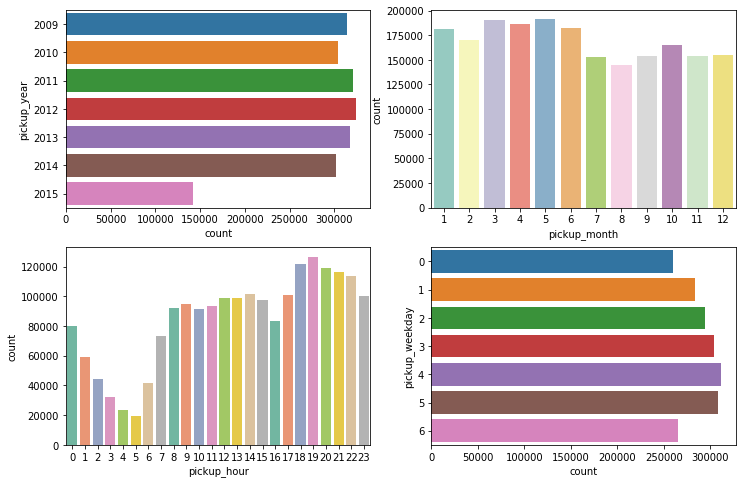

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set3')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

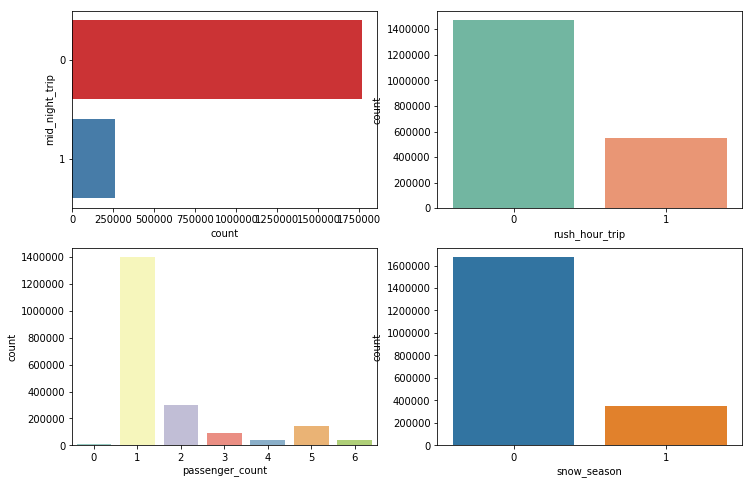

In [29]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df,palette='Set3')

plt.subplot(2,2,4)
sns.countplot(x='snow_season', data=df)

plt.show()

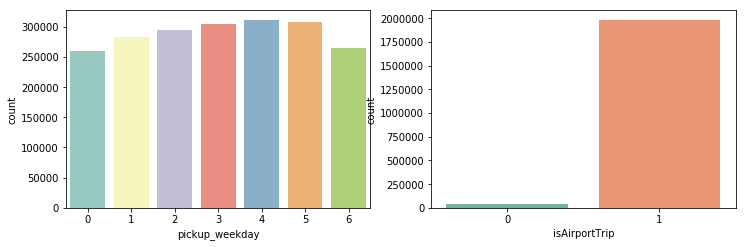

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='pickup_weekday',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.countplot(x='isAirportTrip',data=df,palette='Set2')

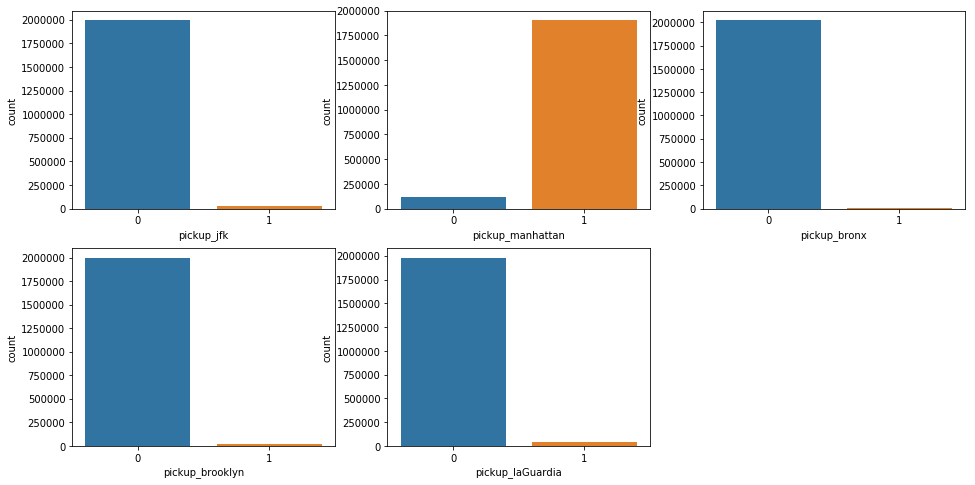

In [104]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
#plt.show()

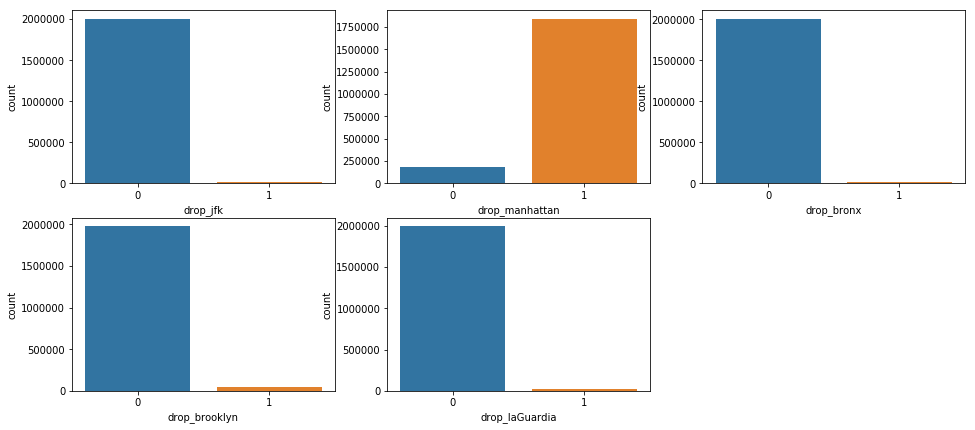

In [89]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

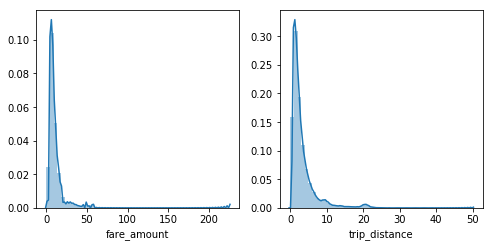

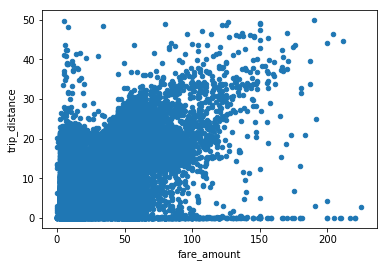

In [133]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

df.plot(x='fare_amount',y='trip_distance',kind='scatter')

ValueError: scatter requires x column to be numeric

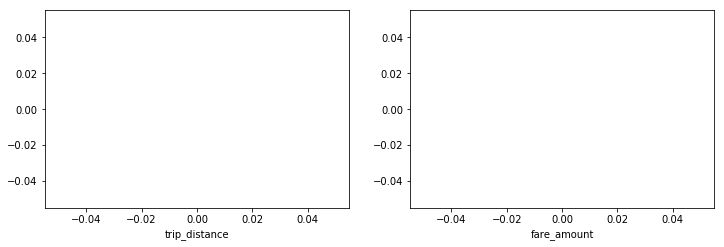

In [132]:
def fare_and_trip_dist_50():
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)

    x=df[df['trip_distance']>50]
    sns.distplot(x['trip_distance'],kde=True)

    plt.subplot(2,2,2)
    sns.distplot(x['fare_amount'],kde=True)

    x.plot(x='fare_amount',y='trip_distance',kind='scatter')
fare_and_trip_dist_50()

In [134]:
#remove data where trip distance > 50

df=df[~(df['trip_distance']>50)]
df=df[~(df['fare_amount']>=220)]

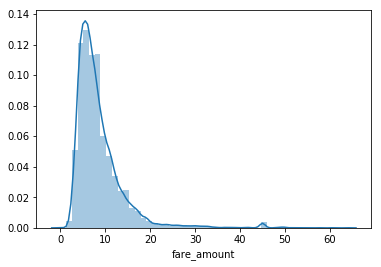

In [135]:
cancel_ride=df[(df['fare_amount']>=0) & (df['passenger_count']==0)]
sns.distplot(cancel_ride['fare_amount'],kde=True)

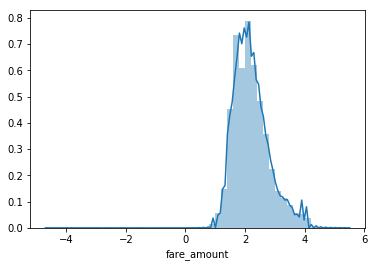

In [55]:
sns.distplot(np.log(df['fare_amount']),kde=True)

<h3> Airport vs Non Aiport Trip Fare Distributinon </h3>

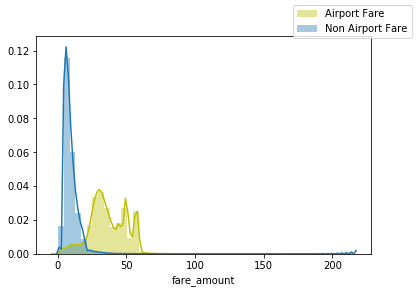

In [137]:
df_airport=df[df['isAirportTrip']==1]
df_non_airport=df[df['isAirportTrip']==0]

fig = plt.figure(figsize=(6,4))
sns.distplot(df_airport['fare_amount'],kde=True,color="y")
sns.distplot(df_non_airport['fare_amount'],kde=True)
fig.legend(labels=['Airport Fare','Non Airport Fare'])
plt.show()

<h3> Different Area Fare Distributinon </h3>

In [138]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]


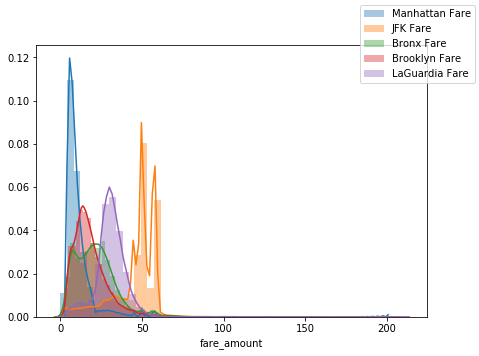

In [140]:
fig = plt.figure(figsize=(6,5))

sns.distplot(df_manhattan['fare_amount'],kde=True)
sns.distplot(df_jfk['fare_amount'],kde=True)
sns.distplot(df_bronx['fare_amount'],kde=True)
sns.distplot(df_brooklyn['fare_amount'],kde=True)
sns.distplot(df_LGD['fare_amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

<h2> Fare Distribution of Manhattan </h2>

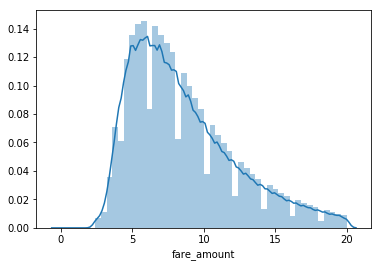

In [141]:
df_man=df[ (df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1)]
sns.distplot(df_man['fare_amount'],kde=True)

In [142]:
df_man['fare_amount'].sum()/df_man.shape[0]
df=df[~((df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1) & (df['fare_amount'] > 20))]

<h3> Fare Distribution at Different Time Zone </h3>

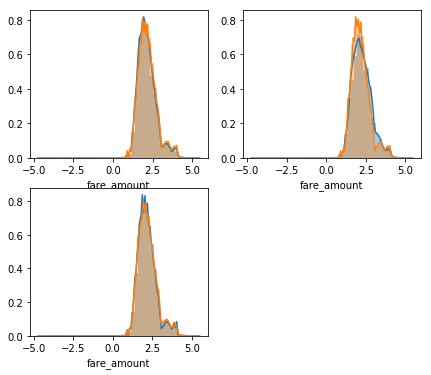

In [162]:
df_snow=df[df['snow_season']==1]
df_non_snow=df[df['snow_season']==0]

fig = plt.figure(figsize=(7,6))
ax=plt.subplot(2,2,1)
sns.distplot(np.log(df_snow['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_snow['fare_amount']),ax=ax)


df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_mid['fare_amount']),ax=ax)

df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_rush_hour['fare_amount']),ax=ax)

In [146]:
df=df.drop('pickup_datetime',axis=1)

In [163]:
X=df.drop(columns=['fare_amount'])
y=df['fare_amount']

In [164]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

2.8364767905976116

In [166]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=10)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
mean_squared_error(y_test,y_pred)

0.007301622272460683

In [169]:
pd.DataFrame(data={"Actual":y_test,"Y_Pred":y_pred}).head()

,Actual,Y_Pred
1164110,6.5,6.5
1177404,8.9,8.9
2008233,8.1,8.1
1436081,7.3,7.3
1828102,10.5,10.5


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mean_squared_error(y_test,y_pred)

0.004162200281740056

In [171]:
pd.DataFrame(data={"Actual":y_test,"Y_Pred":y_pred}).head()

,Actual,Y_Pred
1164110,6.5,6.508357
1177404,8.9,8.925668
2008233,8.1,8.097605
1436081,7.3,7.314736
1828102,10.5,10.503549
